In [1]:
import numpy as np
import pandas as pd
from PIL import Image

!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

mpl.style.use ('ggplot')

print ('Matplotlib version: ',mpl.__version__)

Matplotlib version:  3.3.4


In [2]:
!conda install -c anaconda xlrd --yes

Solving environment: done

# All requested packages already installed.



In [3]:
df_can = pd.read_excel('https://github.com/ardhiraka/PFDS_sources/blob/master/Canada.xlsx?raw=true',
                      sheet_name= 'Canada by Citizenship',
                      skiprows=range(20),
                      skipfooter=2)

print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [4]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2012,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2635,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,620,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3774,4331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_can

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2012,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2635,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,620,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3774,4331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,...,1731,2112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,...,174,217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,...,46,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#data untuk word cloud

alice_novel = open('./data/alice_novel.txt', 'r').read()

print(STOPWORDS)

{'else', 'further', 'be', 'same', 'were', 'an', 'there', 'most', 'can', 'if', 'against', 'shall', 'too', 'doing', 'our', 'does', "don't", 'as', 'http', "wouldn't", 'during', 'has', 'cannot', 'having', 'she', 'into', 'but', 'am', 'other', 'him', 'how', 'over', "what's", "we're", 'between', 'by', 'should', 'their', 'hence', "they'd", "didn't", "they've", 'get', 'here', 'is', 'whom', 'such', 'myself', "he'll", 'therefore', 'down', 'what', "weren't", "aren't", 'theirs', "hasn't", 'ought', 'you', 'me', 'on', 'only', 'some', "let's", 'until', "here's", 'k', "he'd", 'who', 'we', 'a', "he's", 'above', 'any', "couldn't", 'my', 'in', 'while', "haven't", 'could', "there's", 'so', 'com', 'own', 'itself', 'or', 'your', "you'd", 'do', "we'll", "why's", 'all', "can't", 'himself', "won't", "they'll", 'these', 'r', "i'll", 'ever', 'of', 'its', 'and', 'at', 'which', "isn't", 'with', "that's", 'through', 'it', 'herself', 'being', 'for', "i'm", "wasn't", 'both', 'off', 'ours', "we've", "we'd", 'also', 'hi

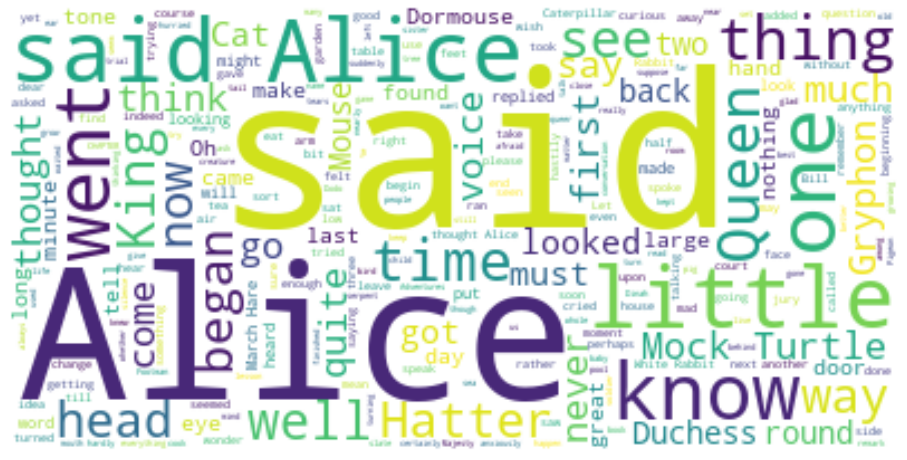

In [7]:
alice_wordcloud = WordCloud(
    background_color="white",
    max_words=2000,
    stopwords=STOPWORDS
)
alice_wordcloud.generate(alice_novel)


fig = plt.figure()
fig.set_figwidth(16)
fig.set_figheight(18)

plt.imshow(alice_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [8]:
alice_mask = np.array(Image.open('./data/alice_mask.png'))

print(alice_mask)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


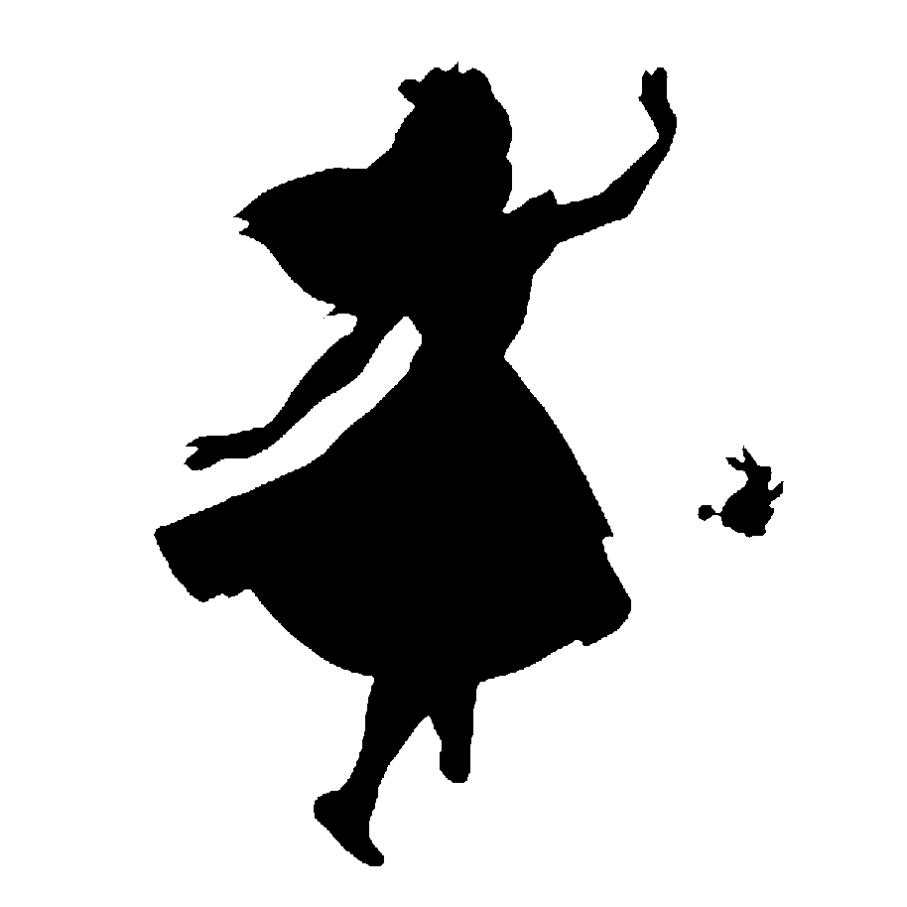

<Figure size 1152x1296 with 0 Axes>

In [9]:
fig = plt.figure()
fig.set_figwidth(16)
fig.set_figheight(18)

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

fig = plt.figure()
fig.set_figwidth(16)
fig.set_figheight(18)

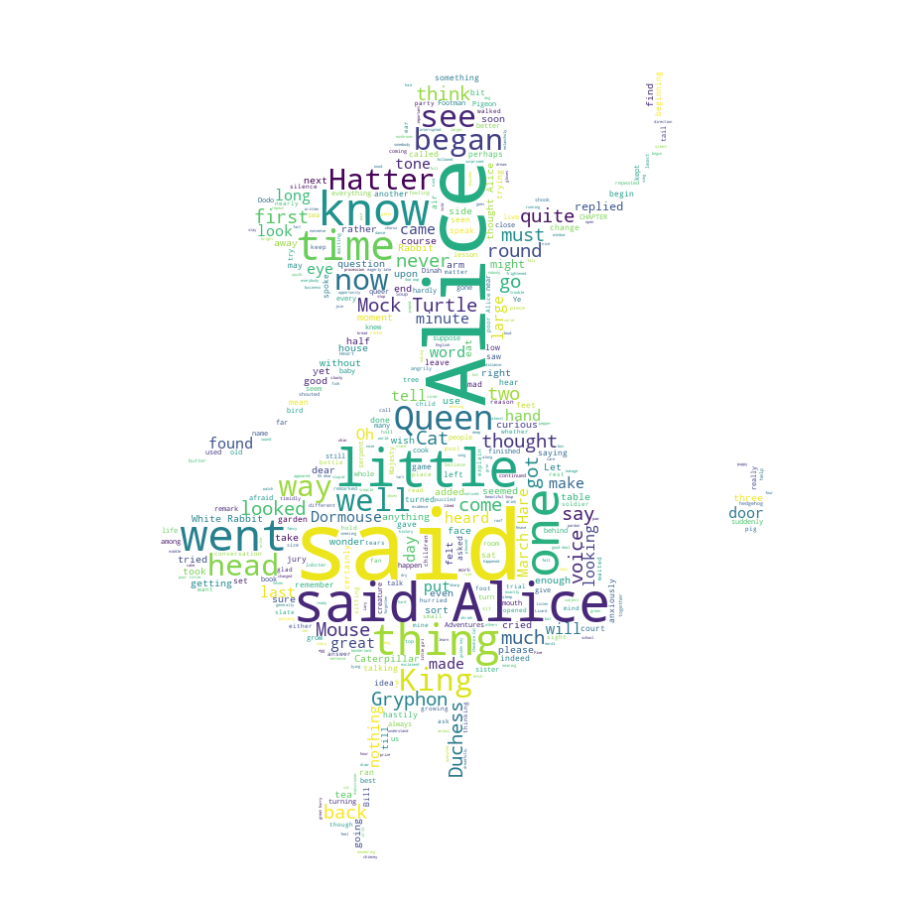

In [10]:
alice_wordcloud = WordCloud(
    background_color="white",
    max_words=2000,
    stopwords=STOPWORDS,
    mask=alice_mask
)
alice_wordcloud.generate(alice_novel)

fig = plt.figure()
fig.set_figwidth(16)
fig.set_figheight(18)

plt.imshow(alice_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [11]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2012,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2635,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,620,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3774,4331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_can = pd.read_excel('https://github.com/ardhiraka/PFDS_sources/blob/master/Canada.xlsx?raw=true',
                      sheet_name= 'Canada by Citizenship',
                      skiprows=range(20),
                      skipfooter=2)
print(df_can.head(3))
print(df_can.tail(3))

         Type    Coverage       OdName  AREA AreaName   REG          RegName  \
0  Immigrants  Foreigners  Afghanistan   935     Asia  5501    Southern Asia   
1  Immigrants  Foreigners      Albania   908   Europe   925  Southern Europe   
2  Immigrants  Foreigners      Algeria   903   Africa   912  Northern Africa   

   DEV             DevName  1980  ...  2012  2013  Unnamed: 43  Unnamed: 44  \
0  902  Developing regions    16  ...  2635  2004          NaN          NaN   
1  901   Developed regions     1  ...   620   603          NaN          NaN   
2  902  Developing regions    80  ...  3774  4331          NaN          NaN   

   Unnamed: 45  Unnamed: 46  Unnamed: 47  Unnamed: 48  Unnamed: 49  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   
2          NaN          NaN          NaN          NaN          NaN   

   Unnamed: 50  
0          NaN  
1          NaN  
2          NaN  

[3 rows x 51

In [14]:
df_can = pd.read_excel('https://github.com/ardhiraka/PFDS_sources/blob/master/Canada.xlsx?raw=true',
                      sheet_name= 'Canada by Citizenship',
                      skiprows=range(20),
                      skipfooter=2)

df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage', 'AreaName', 'RegName', 'DevName'], axis=1, inplace=True)
df_can.rename(columns={'OdName':'Country'}, inplace=True)
df_can.set_index('Country')
df_can['Total']=df_can.sum(axis=1)
print(df_can.head(3))

       Country  1980  1981  1982  1983  1984  1985  1986  1987  1988  ...  \
0  Afghanistan    16    39    39    47    71   340   496   741   828  ...   
1      Albania     1     0     0     0     0     0     1     2     2  ...   
2      Algeria    80    67    71    69    63    44    69   132   242  ...   

   2013  Unnamed: 43  Unnamed: 44  Unnamed: 45  Unnamed: 46  Unnamed: 47  \
0  2004          NaN          NaN          NaN          NaN          NaN   
1   603          NaN          NaN          NaN          NaN          NaN   
2  4331          NaN          NaN          NaN          NaN          NaN   

   Unnamed: 48  Unnamed: 49  Unnamed: 50    Total  
0          NaN          NaN          NaN  58639.0  
1          NaN          NaN          NaN  15699.0  
2          NaN          NaN          NaN  69439.0  

[3 rows x 44 columns]


In [15]:
years=range(1980,2014)
print(years)

range(1980, 2014)


In [16]:
df_can.drop(years, axis=1, inplace=True)
df_can

,Country,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Total
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58639.0
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15699.0
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69439.0
3,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0
...,...,...,...,...,...,...,...,...,...,...
190,Viet Nam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97146.0
191,Western Sahara,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
192,Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2985.0
193,Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1677.0


In [17]:
total_immigration = df_can['Total'].sum()
total_immigration

6409153.0

In [18]:
df_can.head()

,Country,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Total
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58639.0
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15699.0
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69439.0
3,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0


In [24]:
max_words = 100
word_string = ""
for country in df_can.index.values:
    if (len(country.split(' ')) == 1):
        s_country = country.split(' ')
        s_country = "".join(s_country)
    repeat_num = int(df_can.loc[country, 'Total']/float(total_immigration) * max_words)

    word_string += (s_country + ' ') * repeat_num
                     
word_string

AttributeError: 'numpy.int64' object has no attribute 'split'

In [20]:
can_immi_wordcloud = WordCloud(
    background_color="white",
    collocations=False
)
can_immi_wordcloud.generate(word_string)

fig = plt.figure()
fig.set_figwidth(16)
fig.set_figheight(18)

plt.imshow(can_immi_wordcloud, interpolation='none')
plt.axis('off')
plt.show()

ValueError: We need at least 1 word to plot a word cloud, got 0.

In [21]:
# regression plot

!pip install seaborn
import seaborn as sns

In [22]:
df_can = pd.read_excel('https://github.com/ardhiraka/PFDS_sources/blob/master/Canada.xlsx?raw=true',
                      sheet_name= 'Canada by Citizenship',
                      skiprows=range(20),
                      skipfooter=2)

df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage', 'AreaName', 'RegName', 'DevName'], axis=1, inplace=True)
df_can.rename(columns={'OdName':'Country'}, inplace=True)
df_can.set_index('Country')

df_tot= pd.DataFrame(df_can[years].sum(axis=0))
df_tot.reset_index(inplace=True)
df_tot.columns = ['Year', 'Total']
df_tot.head()

,Year,Total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


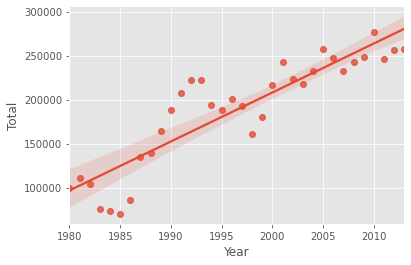

In [119]:
ax = sns.regplot(x='Year', y='Total', data=df_tot)

Text(0.5, 0, 'Tahun')

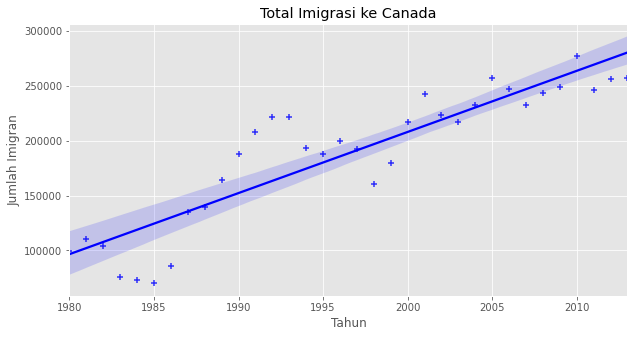

In [30]:
plt.figure(figsize=(10,5))
ax = sns.regplot(x='Year', y='Total', data=df_tot, color='blue', marker ='+')
ax.set_title("Total Imigrasi ke Canada")
ax.set_ylabel("Jumlah Imigran")
ax.set_xlabel("Tahun")

Text(0.5, 0, 'Tahun')

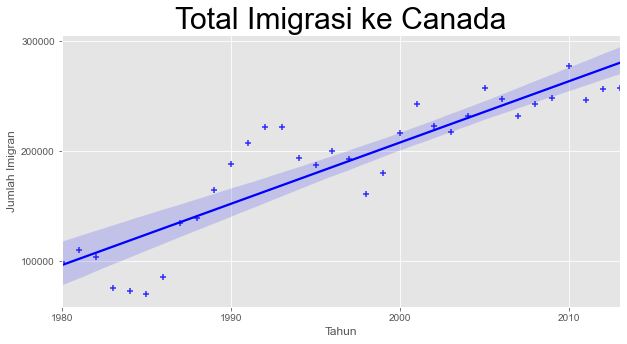

In [31]:
plt.figure(figsize=(10,5))
ax = sns.regplot(x='Year', y='Total', data=df_tot, color='blue', marker ='+')

sns.set(font_scale=2.5)
sns.set_style("whitegrid")

ax.set_title("Total Imigrasi ke Canada")
ax.set_ylabel("Jumlah Imigran")
ax.set_xlabel("Tahun")

In [125]:
df_can

,Country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2012,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
0,Afghanistan,16,39,39,47,71,340,496,741,828,...,2635,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,1,0,0,0,0,0,1,2,2,...,620,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Algeria,80,67,71,69,63,44,69,132,242,...,3774,4331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,American Samoa,0,1,0,0,0,0,0,1,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,0,0,0,0,0,0,2,0,0,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Viet Nam,1191,1829,2162,3404,7583,5907,2741,1406,1411,...,1731,2112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191,Western Sahara,0,0,0,0,0,0,0,0,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,Yemen,1,2,1,6,0,18,7,12,7,...,174,217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,Zambia,11,17,11,7,16,9,15,23,44,...,46,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
df_can.set_index("Country", inplace=True)

In [127]:
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_countries.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


In [130]:
df_can

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2012,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,16,39,39,47,71,340,496,741,828,1076,...,2635,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,1,0,0,0,0,0,1,2,2,3,...,620,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algeria,80,67,71,69,63,44,69,132,242,434,...,3774,4331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
American Samoa,0,1,0,0,0,0,0,1,0,1,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,0,0,0,0,0,0,2,0,0,0,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,1191,1829,2162,3404,7583,5907,2741,1406,1411,3004,...,1731,2112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Yemen,1,2,1,6,0,18,7,12,7,18,...,174,217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
df_tot = pd.DataFrame(df_countries.sum(axis=1))
df_tot.reset_index(inplace=True)
df_tot.columns = ['Year', 'Total']
df_tot.head()

,Year,Total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


In [135]:
import numpy as np
import pandas as pd

In [136]:
!conda install -c conda-forge folium=0.5.0 --yes
!pip install folium
import folium

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /Users/kanziabikarami/opt/anaconda3

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    branca-0.4.2               |     pyhd8ed1ab_0          26 KB  conda-forge
    conda-4.10.1               |   py38h50d1736_0         3.1 MB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    python_abi-3.8             |           1_cp38           4 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.8 MB

The following NEW 

In [143]:
world_map = folium.Map()
world_map

In [145]:
folium.Map(location=[-6.992620, 110.428009], zoom_start=18)

In [155]:
folium.Map(location=[-6.992620, 110.428009], zoom_start=1, tiles='Stamen Watercolor')

In [172]:
df_incidents = pd.read_csv('./data/Police.csv')
df_incidents

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150495,161061000,ASSAULT,BATTERY,Friday,12/30/2016 12:00:00 AM,21:01,PARK,NONE,OAK ST / STANYAN ST,-122.453982,37.771428,"(37.7714278595913, -122.453981622365)",16106100004134
150496,176000742,NON-CRIMINAL,LOST PROPERTY,Friday,12/30/2016 12:00:00 AM,08:00,CENTRAL,NONE,JACKSON ST / SANSOME ST,-122.401857,37.796626,"(37.7966261239618, -122.401857374739)",17600074271000
150497,176000758,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Thursday,12/29/2016 12:00:00 AM,20:00,CENTRAL,NONE,PINE ST / TAYLOR ST,-122.412269,37.790673,"(37.7906727649886, -122.41226909106)",17600075806372
150498,176000764,LARCENY/THEFT,GRAND THEFT OF PROPERTY,Friday,12/30/2016 12:00:00 AM,10:00,CENTRAL,NONE,200 Block of STOCKTON ST,-122.406659,37.788275,"(37.7882745285785, -122.406658711008)",17600076406374


In [173]:
df_incidents.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [189]:
df_incidents.shape

(100, 13)

In [177]:
limit = 100
df_incidents = df_incidents.iloc[0:limit,:]

In [178]:
df_incidents.shape

(100, 13)

In [180]:
latitude = 37.77
longitude = -122.42

In [185]:
map_sf = folium.Map(location=[latitude, longitude], zoom_start=12)

map_sf

In [186]:
incidents=folium.map.FeatureGroup()

for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )
    
map_sf.add_child(incidents)

In [193]:
incidents=folium.map.FeatureGroup()

for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            color='yellow',
            fill=True,
            fill_color='yellow',
            fill_opacity=0.6
        )
    )

latitudes = list(df_incidents.Y)
longitudes = list(df_incidents.X)
labels = list(df_incidents.Category)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(map_sf)
    
map_sf.add_child(incidents)

In [197]:
from folium import plugins
map_sf = folium.Map(location=[latitude, longitude], zoom_start=12)
incidents = plugins.MarkerCluster().add_to(map_sf)

for lat, lng, label, in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.Marker(
        location=[lat, lng],
        popup=label
    ).add_to(incidents)

map_sf


In [198]:
!conda install -c anaconda xlrd --yes

Solving environment: done

## Package Plan ##

  environment location: /Users/kanziabikarami/opt/anaconda3

  added / updated specs:
    - xlrd


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.10.1               |   py38hecd8cb5_1         2.9 MB
    ------------------------------------------------------------
                                           Total:         2.9 MB

The following packages will be UPDATED:

  conda              conda-forge::conda-4.10.1-py38h50d173~ --> pkgs/main::conda-4.10.1-py38hecd8cb5_1



conda-4.10.1         | 2.9 MB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [207]:
df_can = pd.read_excel('./data/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

print('Data downloaded and read into a dataframe!')


Data downloaded and read into a dataframe!


In [208]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2012,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2635,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,620,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3774,4331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [209]:
print(df_can.shape)

(195, 51)


In [210]:
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)

df_can.columns=list(map(str, df_can.columns))

df_can['Total'] =df_can.sum(axis=1)

years=list(map(str, range(1980, 2014)))
print('data dimensions:', df_can.shape)

data dimensions: (195, 47)


In [211]:
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58639.0
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15699.0
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,4331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69439.0
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0


In [228]:
!wget --quiet'./data.world_countries.json'
print ('GeoJSON file downloaded!')

/bin/bash: wget: command not found
GeoJSON file downloaded!


In [219]:
world_geo = r'world_countries.json'

world_map = folium.Map(location[0,0], zoom_start=2,tiles='Mapbox Bright')

world_map.choropleth(
    geo_data=world_geo,
    data=df_can,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', #Yellow, Orange, Red
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Immigration to Canada'
)

world_map

NameError: name 'location' is not defined